In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 讀入三個月期LIBOR資料，算sharpe ratio時當rf

In [2]:
#LIBOR利率，可用來當rf，但2008~2017的資料筆數卻比較多？要用要看怎麼merge
LIBOR = pd.read_csv('/Users/Kang/Desktop/HW2/CSVs/0_3 LIBOR_3M.csv', index_col = 'DATE')
LIBOR = LIBOR[LIBOR['USD3MTD156N'] != '.']
LIBOR = LIBOR.astype({'USD3MTD156N' : float})
LIBOR = LIBOR.div(100)
LIBOR = LIBOR.set_index(pd.to_datetime(LIBOR.index))
LIBOR['2008-01-02':'2017-12-29']

,USD3MTD156N
DATE,
2008-01-02,0.046806
2008-01-03,0.046463
2008-01-04,0.046200
2008-01-07,0.045431
2008-01-08,0.045050
2008-01-09,0.044425
2008-01-10,0.043769
2008-01-11,0.042575
2008-01-14,0.040550


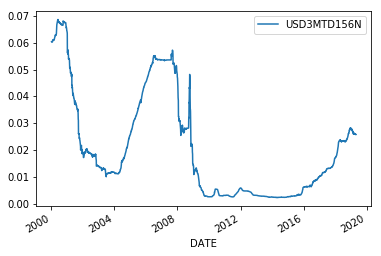

In [3]:
LIBOR.plot()

# 讀入起自2008年的股價資料，先算daily return再換算monthly return

In [4]:
df = pd.read_csv('/Users/Kang/Desktop/HW2/CSVs/0_2 ETF 2008_2017.csv', index_col = 'Date')
df = df.set_index(pd.to_datetime(df.index))

In [5]:
#換算成daily_return
daily_return = df.pct_change()
daily_return = daily_return.dropna(how = 'all') #drop掉2007-12-31

In [6]:
#所有ETF名稱
all_ticker = daily_return.columns.tolist()

#挑出所有年月的最後一天
all_max_day = []
for i in range(daily_return.index.year.min(), daily_return.index.year.max()+1):
    for j in range(1, 13):
        mday = daily_return.loc[(daily_return.index.year == i) & (daily_return.index.month == j)].index.day.max()
        all_max_day.append(str(i) + '-' + ('0'+str(j) if j < 10 else str(j)) + '-' + str(mday))

In [7]:
#建立df_m用來儲存月報酬
monthly_return = pd.DataFrame(index = all_max_day, columns = all_ticker)
monthly_return = monthly_return.set_index(pd.DatetimeIndex(monthly_return.index))

In [8]:
#換算成monthly_return
for i in monthly_return.index:
    for j in all_ticker:
        d_return = daily_return[j][(daily_return.index.year == i.year) & (daily_return.index.month == i.month)]
        monthly_return[j][i] = (1 + d_return).cumprod()[-1] - 1

In [9]:
monthly_return

,AGG,EMB,EWT,IVV,JNK,PFF,TLT,VGK,VNQ,VPL,VWO
2008-01-31,0.0231302,0.00947102,-0.089155,-0.0626965,-0.0233967,0.0973488,0.0209581,-0.0898154,-0.00780984,-0.0553506,-0.090221
2008-02-29,-0.00160068,-0.00406475,0.1271,-0.0275556,-0.034404,-0.00107939,-0.00455278,-0.00293685,-0.0318135,-0.0175,0.0287706
2008-03-31,0.00129747,0.000930937,0.0272197,-0.00631514,0.0046464,-0.0569642,0.0213892,0.0131074,0.0648526,-0.019243,-0.0367752
2008-04-30,0.00327508,0.0116158,0.044795,0.0482493,0.0372413,0.0633014,-0.024863,0.0409942,0.0637923,0.077185,0.0843345
2008-05-30,-0.0126525,0.0010462,-0.0199275,0.0128415,0.00387323,-0.00369009,-0.0268827,0.00670303,-0.00210926,0.0222795,0.0178502
2008-06-30,-0.00184917,-0.0198113,-0.12939,-0.0838839,-0.0345545,-0.0946641,0.0265359,-0.0898877,-0.106154,-0.0801063,-0.0980921
2008-07-31,0.00393986,0.00787871,-0.0700637,-0.00742179,-0.0111478,-0.0462702,-0.00367336,-0.0288063,0.0311536,-0.0393789,-0.0472222
2008-08-29,0.00741851,0.00715307,-0.0083712,0.0148761,-0.00219789,0.00126808,0.027393,-0.0384498,0.0237381,-0.0511581,-0.0791658
2008-09-30,-0.0175968,-0.0714504,-0.171144,-0.0888156,-0.0761747,-0.246504,0.0147586,-0.128937,-0.00123703,-0.0915,-0.155869
2008-10-31,-0.0228108,-0.193936,-0.184259,-0.166324,-0.190863,0.0432927,-0.0186061,-0.218287,-0.31727,-0.185579,-0.272649


# 讀取有view的權重，逐月當成P

In [10]:
CP_w = pd.read_csv('/Users/Kang/Desktop/HW2/CSVs/3_2 RI long short weight.csv', index_col = 0)
CP_w = CP_w.set_index(pd.to_datetime(CP_w.index))
CP_w = CP_w[all_ticker] #用all_ticker的順序來排列column

In [11]:
all_max_day_from_2010 = CP_w.index.values #all_max_day有120個月

#df_w用來儲存最後的原始權重（加起來不見得等於1）
df_w = pd.DataFrame(index = all_max_day_from_2010, columns = all_ticker)
df_w = df_w.set_index(pd.DatetimeIndex(df_w.index))

#df_w_adj用來儲存最後的調整權重（加起來等於1）
df_w_adj = pd.DataFrame(index = all_max_day_from_2010, columns = all_ticker)
df_w_adj = df_w_adj.set_index(pd.DatetimeIndex(df_w_adj.index))

# 使用Black-Litterman，逐月計算最後權重，有調整、沒調整分開存

In [12]:
#從頭到尾固定的參數
w0 = {'AGG' : 0.1, 'EMB' : 0.05, 'EWT' : 0.1, 'IVV' : 0.2, 'JNK' : 0.05, 'PFF' : 0.05, 'TLT' : 0.05, 'VGK' : 0.1, 'VNQ' : 0.1, 'VPL' : 0.1, 'VWO' : 0.1}
Weq = np.array([[w0[i] for i in all_ticker]]).T
gamma = 3.37
tau = 0.05
Q = 0.035 #CP是0.05，#RI是0.035
Omega = np.array([[0.05]]) #要用此寫法才能反矩陣

In [13]:
for i in range(len(CP_w)):

    P = np.array([CP_w.iloc[i].values]) #CP_w有96個月，8年
    Sigma = np.cov(monthly_return.iloc[i : i + 25].astype(float), rowvar = False) #df_m有120個月，10年
    Pi = gamma * Sigma.dot(Weq)
    #Omega = P.dot(tau*Sigma).dot(P.T)
    M_inv = np.linalg.inv(np.linalg.inv(tau * Sigma) + (P.T).dot(np.linalg.inv(Omega)).dot(P))
    Sigma_bar = Sigma + M_inv
    Sigma_bar_inv = np.linalg.inv(Sigma_bar)
    W_star = (1/gamma) * Sigma_bar_inv.dot(M_inv).dot(np.linalg.inv(tau * Sigma).dot(Pi) + (P.T).dot(np.linalg.inv(Omega)).dot(Q))
    W_star_adj = W_star/W_star.sum() #把和調整為1
    df_w.iloc[i] = W_star.T #都要反轉才能存
    df_w_adj.iloc[i] = W_star_adj.T

In [14]:
df_w

,AGG,EMB,EWT,IVV,JNK,PFF,TLT,VGK,VNQ,VPL,VWO
2010-01-29,0.0936005,0.047619,0.0957839,0.190476,0.0465273,0.047619,0.0454356,0.0946922,0.0968757,0.0974215,0.0963298
2010-02-26,0.0952381,0.047619,0.0977624,0.189635,0.0493019,0.047619,0.0450947,0.0918724,0.0960795,0.0986038,0.0935552
2010-03-31,0.0940288,0.047619,0.0964474,0.19229,0.047619,0.0470144,0.0452004,0.0934241,0.0976568,0.0952381,0.0958428
2010-04-30,0.0936954,0.047619,0.0952381,0.19279,0.0491617,0.0483904,0.0445337,0.0944667,0.0929241,0.0952381,0.0983235
2010-05-28,0.0952381,0.047619,0.0972317,0.191473,0.0516063,0.0446286,0.0466222,0.0912509,0.0932445,0.0952381,0.0982285
2010-06-30,0.100588,0.047619,0.0992504,0.191814,0.0449442,0.047619,0.0502939,0.0898884,0.0912258,0.0952381,0.0939007
2010-07-30,0.0984375,0.047619,0.0973711,0.191543,0.047619,0.0465526,0.0454861,0.0909722,0.0920387,0.0952381,0.099504
2010-08-31,0.0981931,0.047619,0.0942531,0.191461,0.049589,0.047619,0.0436791,0.0922831,0.0932681,0.0952381,0.099178
2010-09-30,0.0938557,0.047619,0.0959293,0.190476,0.0490014,0.0503838,0.0448543,0.0931646,0.0945469,0.0952381,0.0973116
2010-10-29,0.0935249,0.047619,0.0958092,0.192189,0.047048,0.047619,0.0453348,0.094096,0.0963802,0.0952381,0.0975223


In [15]:
df_w_adj

,AGG,EMB,EWT,IVV,JNK,PFF,TLT,VGK,VNQ,VPL,VWO
2010-01-29,0.0982806,0.05,0.100573,0.2,0.0488537,0.05,0.0477074,0.0994269,0.101719,0.102293,0.101146
2010-02-26,0.1,0.05,0.102651,0.199116,0.051767,0.05,0.0473495,0.096466,0.100884,0.103534,0.098233
2010-03-31,0.0987302,0.05,0.10127,0.201905,0.05,0.0493651,0.0474604,0.0980953,0.10254,0.1,0.100635
2010-04-30,0.0983802,0.05,0.1,0.20243,0.0516198,0.0508099,0.0467603,0.0991901,0.0975703,0.1,0.10324
2010-05-28,0.1,0.05,0.102093,0.201047,0.0541866,0.0468601,0.0489534,0.0958134,0.0979067,0.1,0.10314
2010-06-30,0.105617,0.05,0.104213,0.201404,0.0471914,0.05,0.0528086,0.0943828,0.0957871,0.1,0.0985957
2010-07-30,0.103359,0.05,0.10224,0.20112,0.05,0.0488802,0.0477604,0.0955208,0.0966406,0.1,0.104479
2010-08-31,0.103103,0.05,0.0989658,0.201034,0.0520685,0.05,0.0458631,0.0968973,0.0979315,0.1,0.104137
2010-09-30,0.0985485,0.05,0.100726,0.2,0.0514515,0.0529029,0.0470971,0.0978228,0.0992743,0.1,0.102177
2010-10-29,0.0982012,0.05,0.1006,0.201799,0.0494004,0.05,0.0476016,0.0988008,0.101199,0.1,0.102398


In [18]:
#df_w.to_csv('/Users/Kang/Desktop/BL CP weight_unadj.csv')
#df_w_adj.to_csv('/Users/Kang/Desktop/BL CP weight_adj.csv')
#df_w.to_csv('/Users/Kang/Desktop/BL RI weight_unadj.csv')
#df_w_adj.to_csv('/Users/Kang/Desktop/BL RI weight_adj.csv')

In [17]:
#未調整前的權重全部加起來都一樣？
for i in range(len(df_w)):
    print(df_w.iloc[i].sum())

0.9523809523809348
0.9523809523809619
0.9523809523807396
0.952380952380959
0.9523809523808752
0.9523809523808273
0.9523809523810955
0.9523809523810515
0.9523809523810168
0.9523809523809179
0.9523809523810127
0.9523809523809392
0.9523809523807996
0.9523809523809379
0.952380952380967
0.9523809523809892
0.9523809523809791
0.9523809523809399
0.952380952380982
0.952380952380954
0.9523809523809457
0.9523809523810297
0.9523809523809731
0.9523809523809569
0.9523809523808923
0.952380952380956
0.9523809523809628
0.9523809523809199
0.9523809523809578
0.9523809523809227
0.9523809523809929
0.952380952380966
0.9523809523809278
0.9523809523809167
0.952380952380961
0.9523809523809526
0.9523809523809372
0.9523809523809768
0.9523809523809695
0.9523809523809468
0.9523809523809202
0.9523809523809307
0.952380952380972
0.9523809523809575
0.9523809523809424
0.9523809523809497
0.9523809523809665
0.952380952380939
0.9523809523809718
0.9523809523809591
0.9523809523809537
0.9523809523809526
0.9523809523809699
0.